In [1]:
import cv2
from io import BytesIO
from PIL import Image
import IPython

In [3]:
MOVIE_FILE_PATH = "../resources/movie/sample.mp4"
SS_FILE_PATH = "../resources/screenshot/"
TEMPLATE_FILE_PATH = "../resources/template/"

In [19]:
# debug用
def show(frame, fmt='jpeg'):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    f = BytesIO()
    Image.fromarray(frame).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

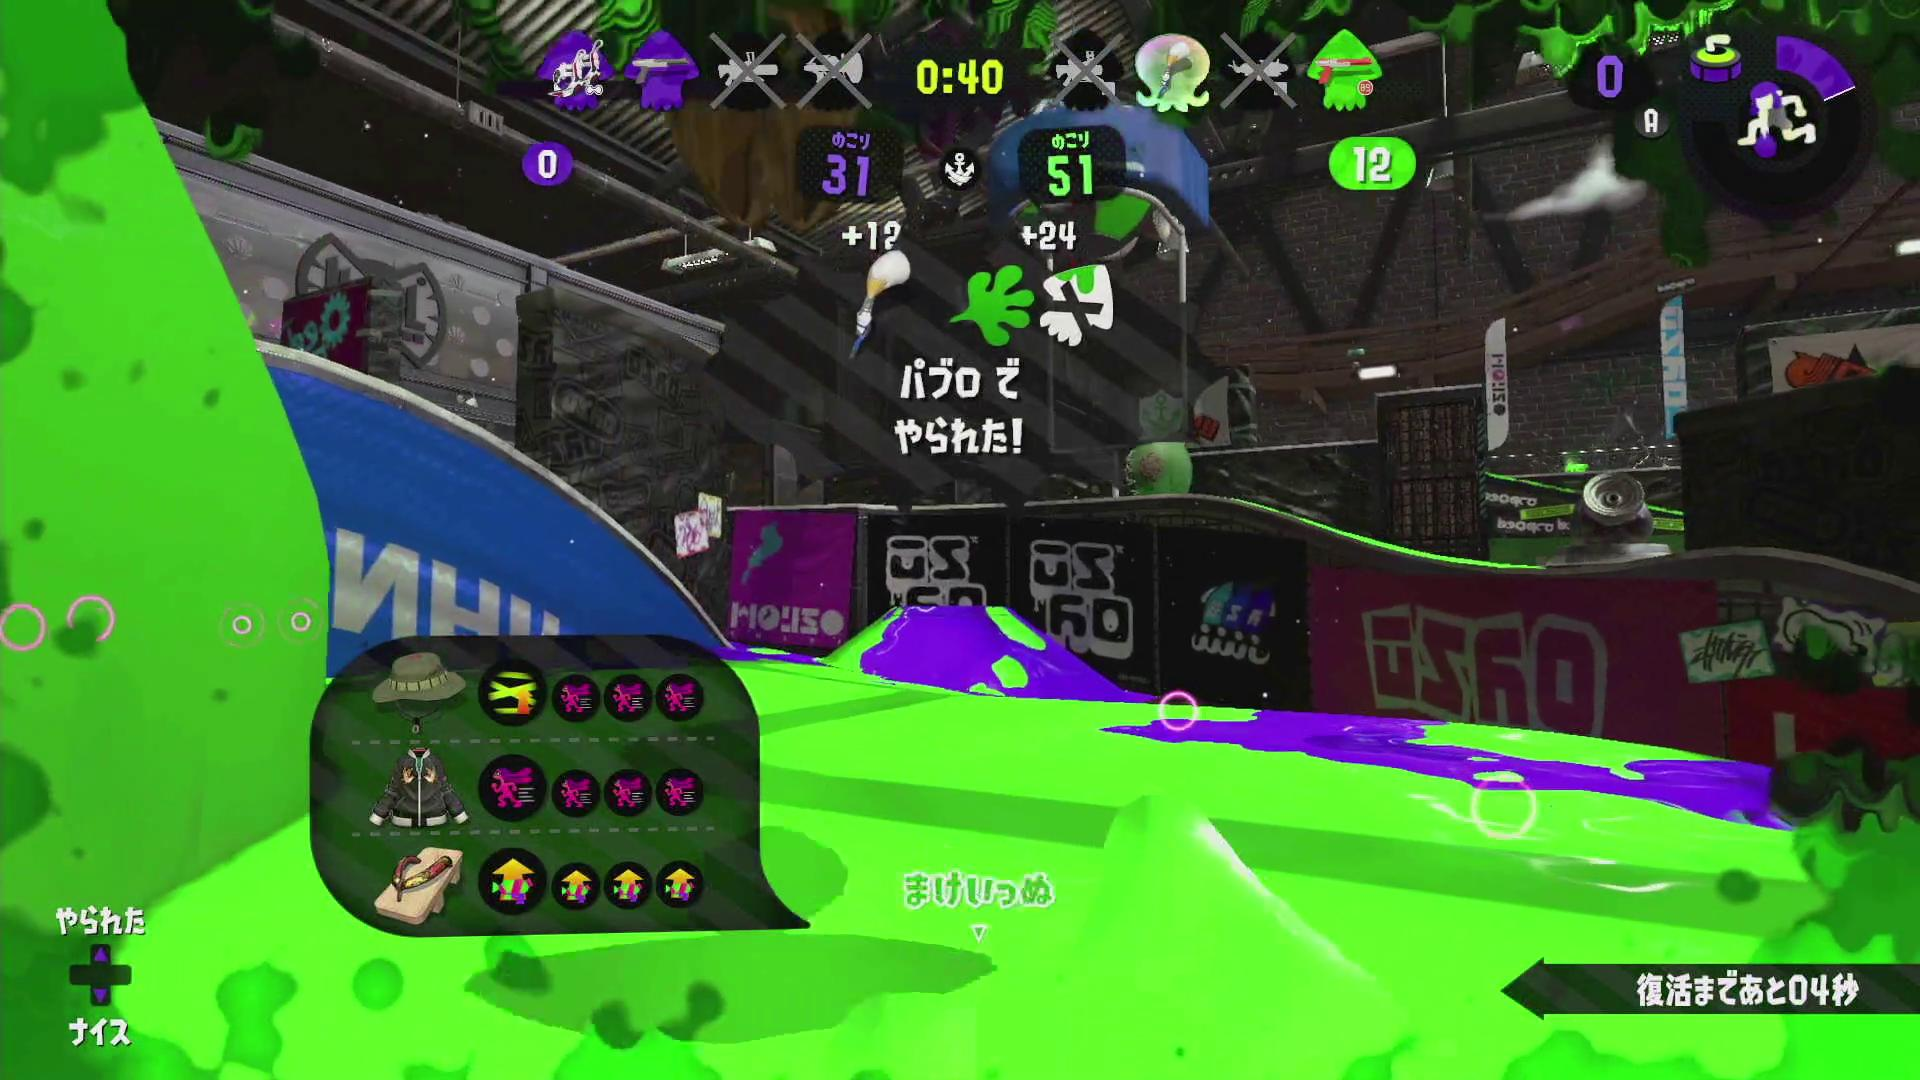

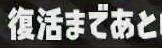

In [39]:
#画像をグレースケールで読み込む
img = cv2.imread(f"{SS_FILE_PATH}/in_battle/death2.png")
temp = cv2.imread(f"{TEMPLATE_FILE_PATH}/fukkatu2.png")
show(img)
show(temp)

(1629, 966) (1791, 1014)


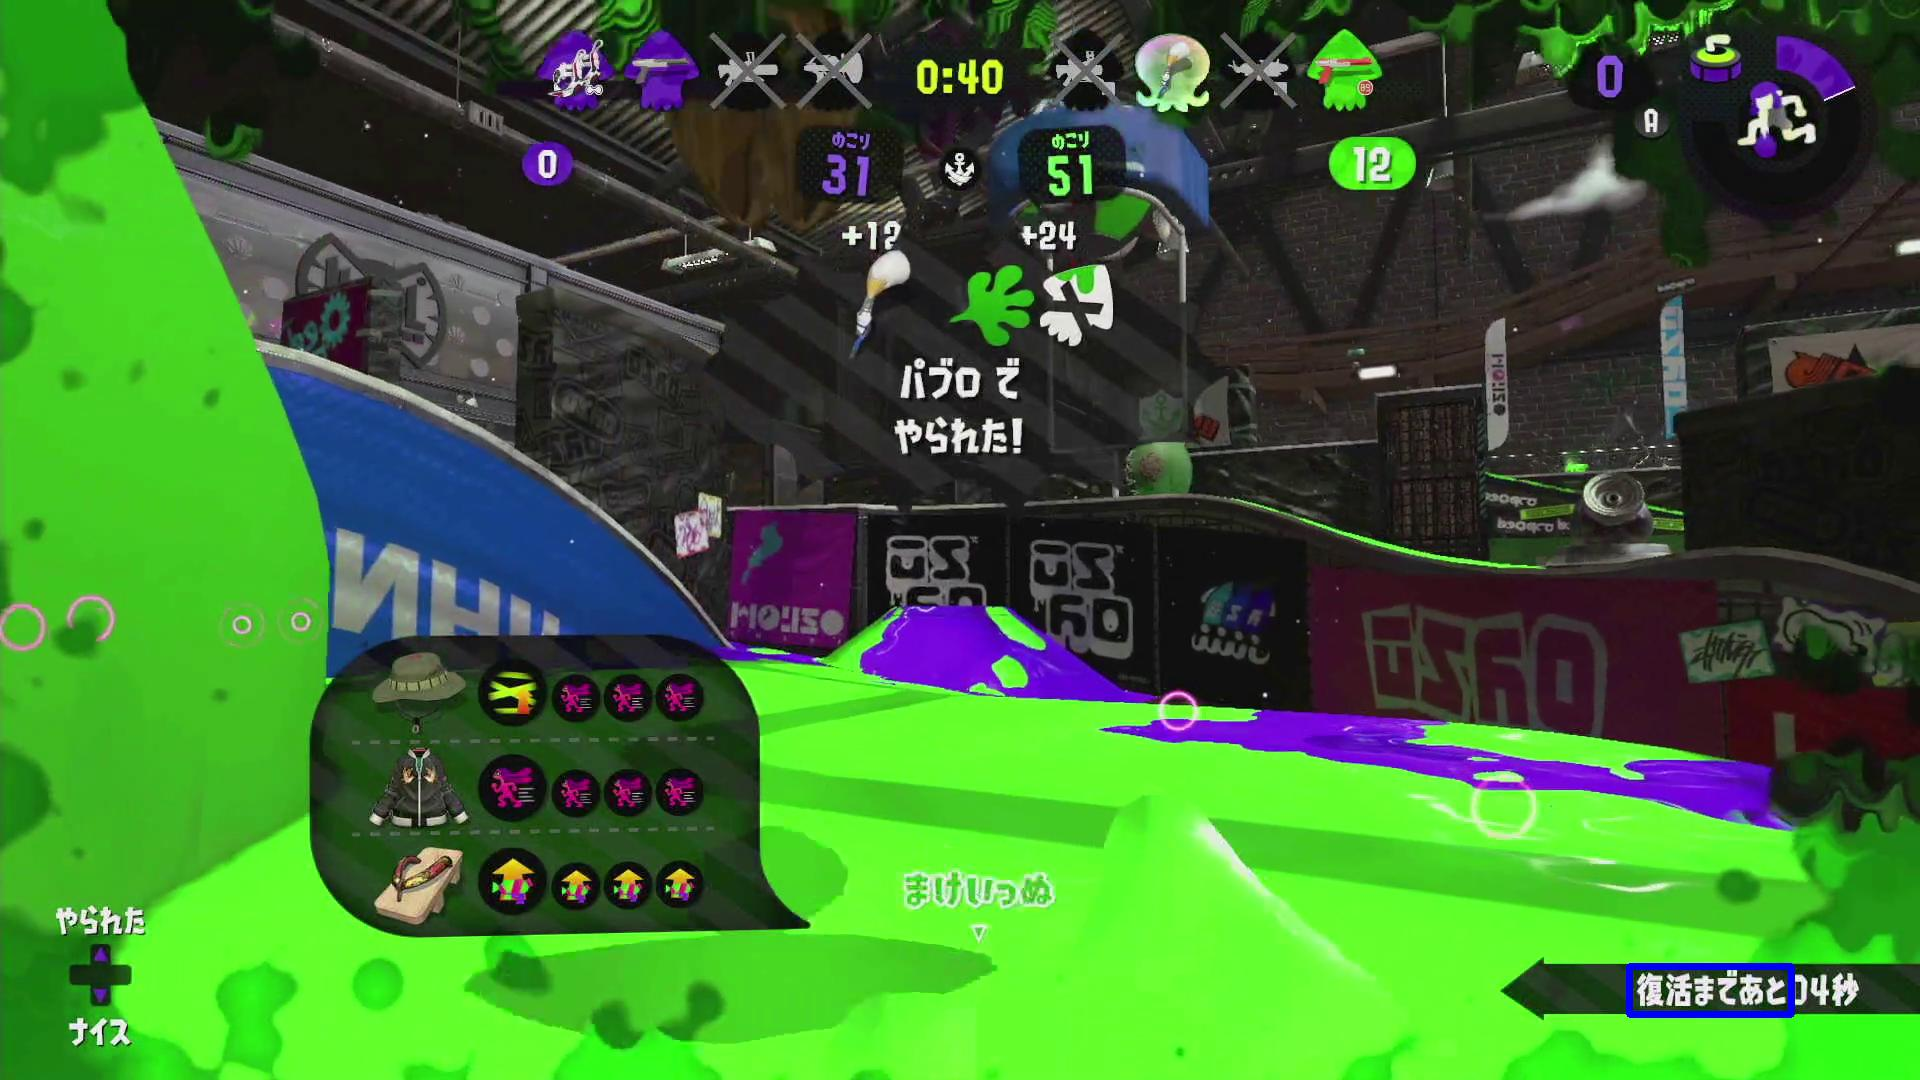

In [38]:

#マッチングテンプレートを実行
#比較方法はcv2.TM_CCOEFF_NORMEDを選択
result = cv2.matchTemplate(img, temp, cv2.TM_CCOEFF_NORMED)

#検出結果から検出領域の位置を取得
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
w, h = temp.shape[::-1]
bottom_right = (top_left[0] + w, top_left[1] + h)
print(top_left, bottom_right)

#検出領域を四角で囲んで保存
result_image = cv2.imread(f"{SS_FILE_PATH}/in_battle/death2.png")
cv2.rectangle(result_image,top_left, bottom_right, (255, 0, 0), 5)
show(result_image)

In [45]:
def matching(target_file_path, template_path):
    #画像をグレースケールで読み込む
    img = cv2.imread(target_file_path, 0)
    temp = cv2.imread(template_path, 0)
    
    #マッチングテンプレートを実行
    #比較方法はcv2.TM_CCOEFF_NORMEDを選択
    result = cv2.matchTemplate(img, temp, cv2.TM_CCOEFF_NORMED)

    #検出結果から検出領域の位置を取得
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    top_left = max_loc
    w, h = temp.shape[::-1]
    bottom_right = (top_left[0] + w, top_left[1] + h)
    print(top_left, bottom_right)

    #検出領域を四角で囲んで保存
    result_image = cv2.imread(target_file_path)
    cv2.rectangle(result_image,top_left, bottom_right, (0, 0, 255), 5)
    return result_image


(1629, 966) (1791, 1014)


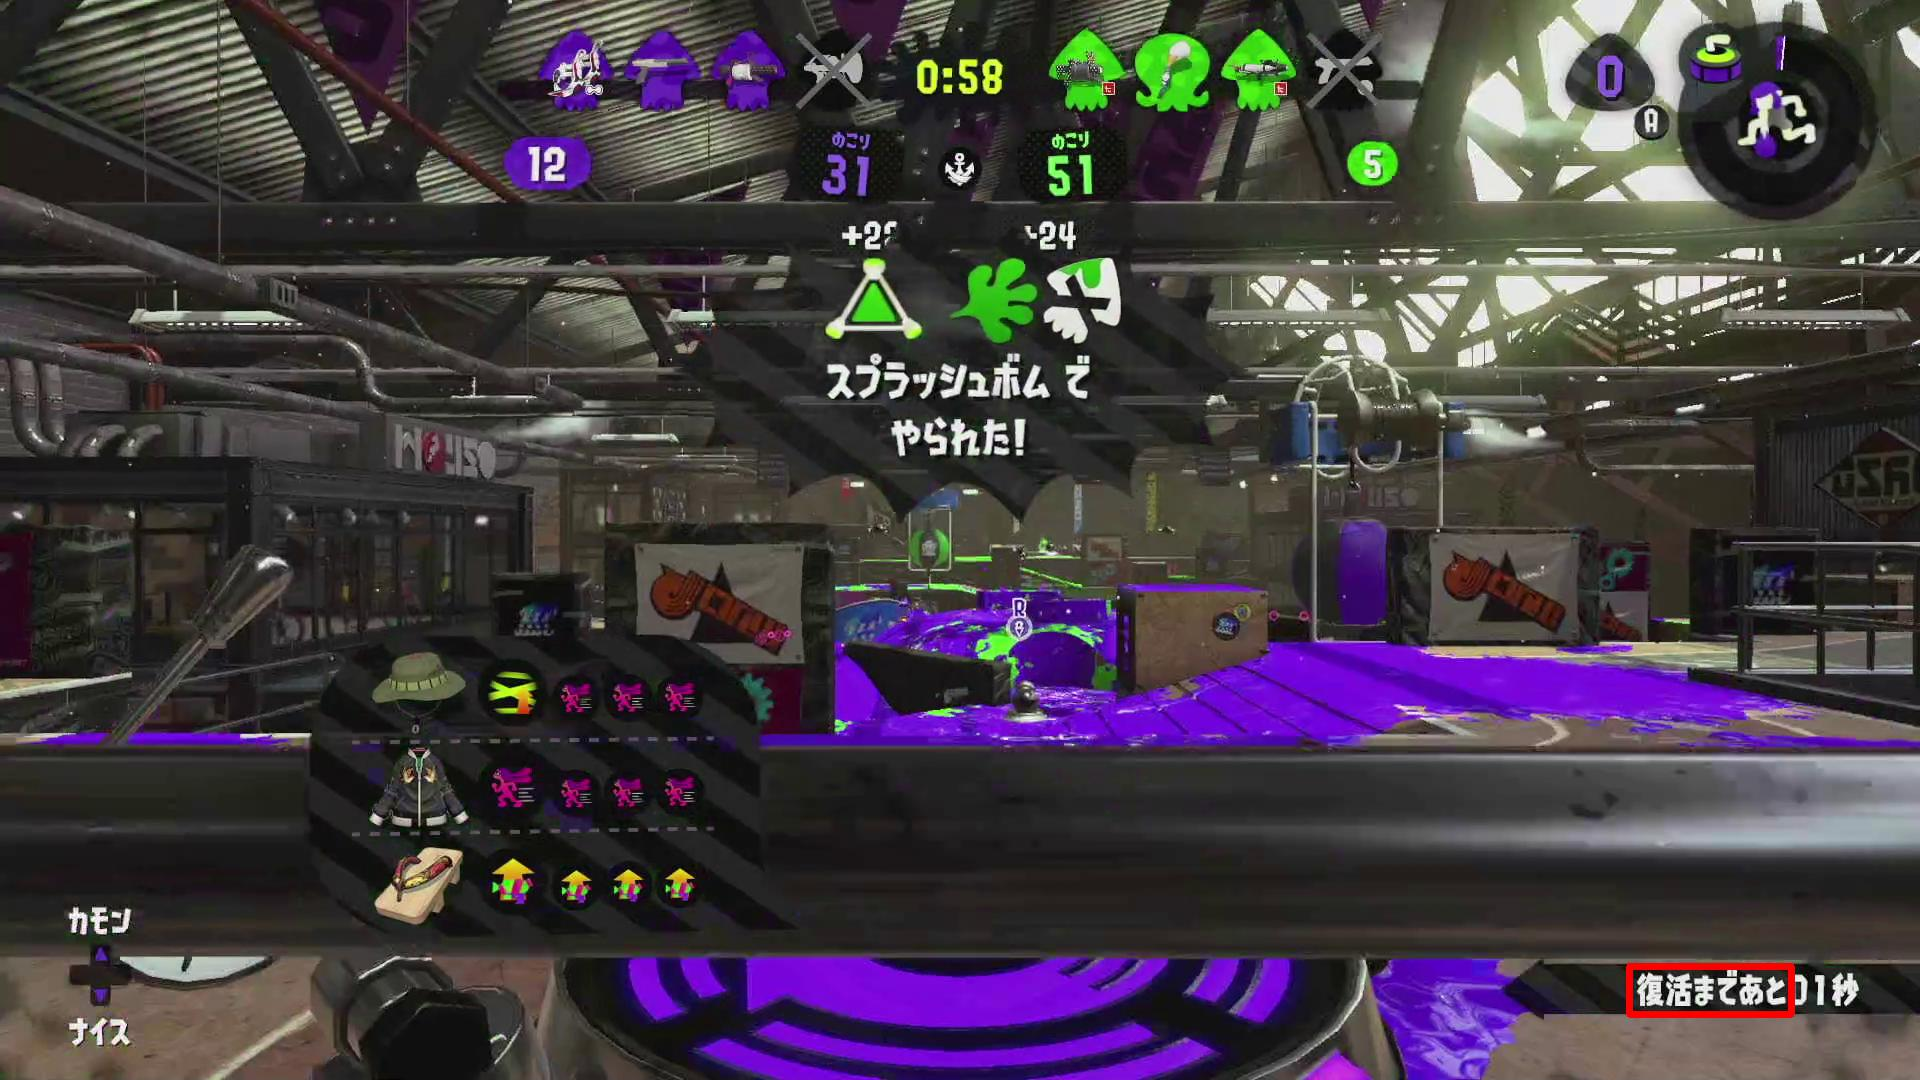

(1629, 966) (1791, 1014)


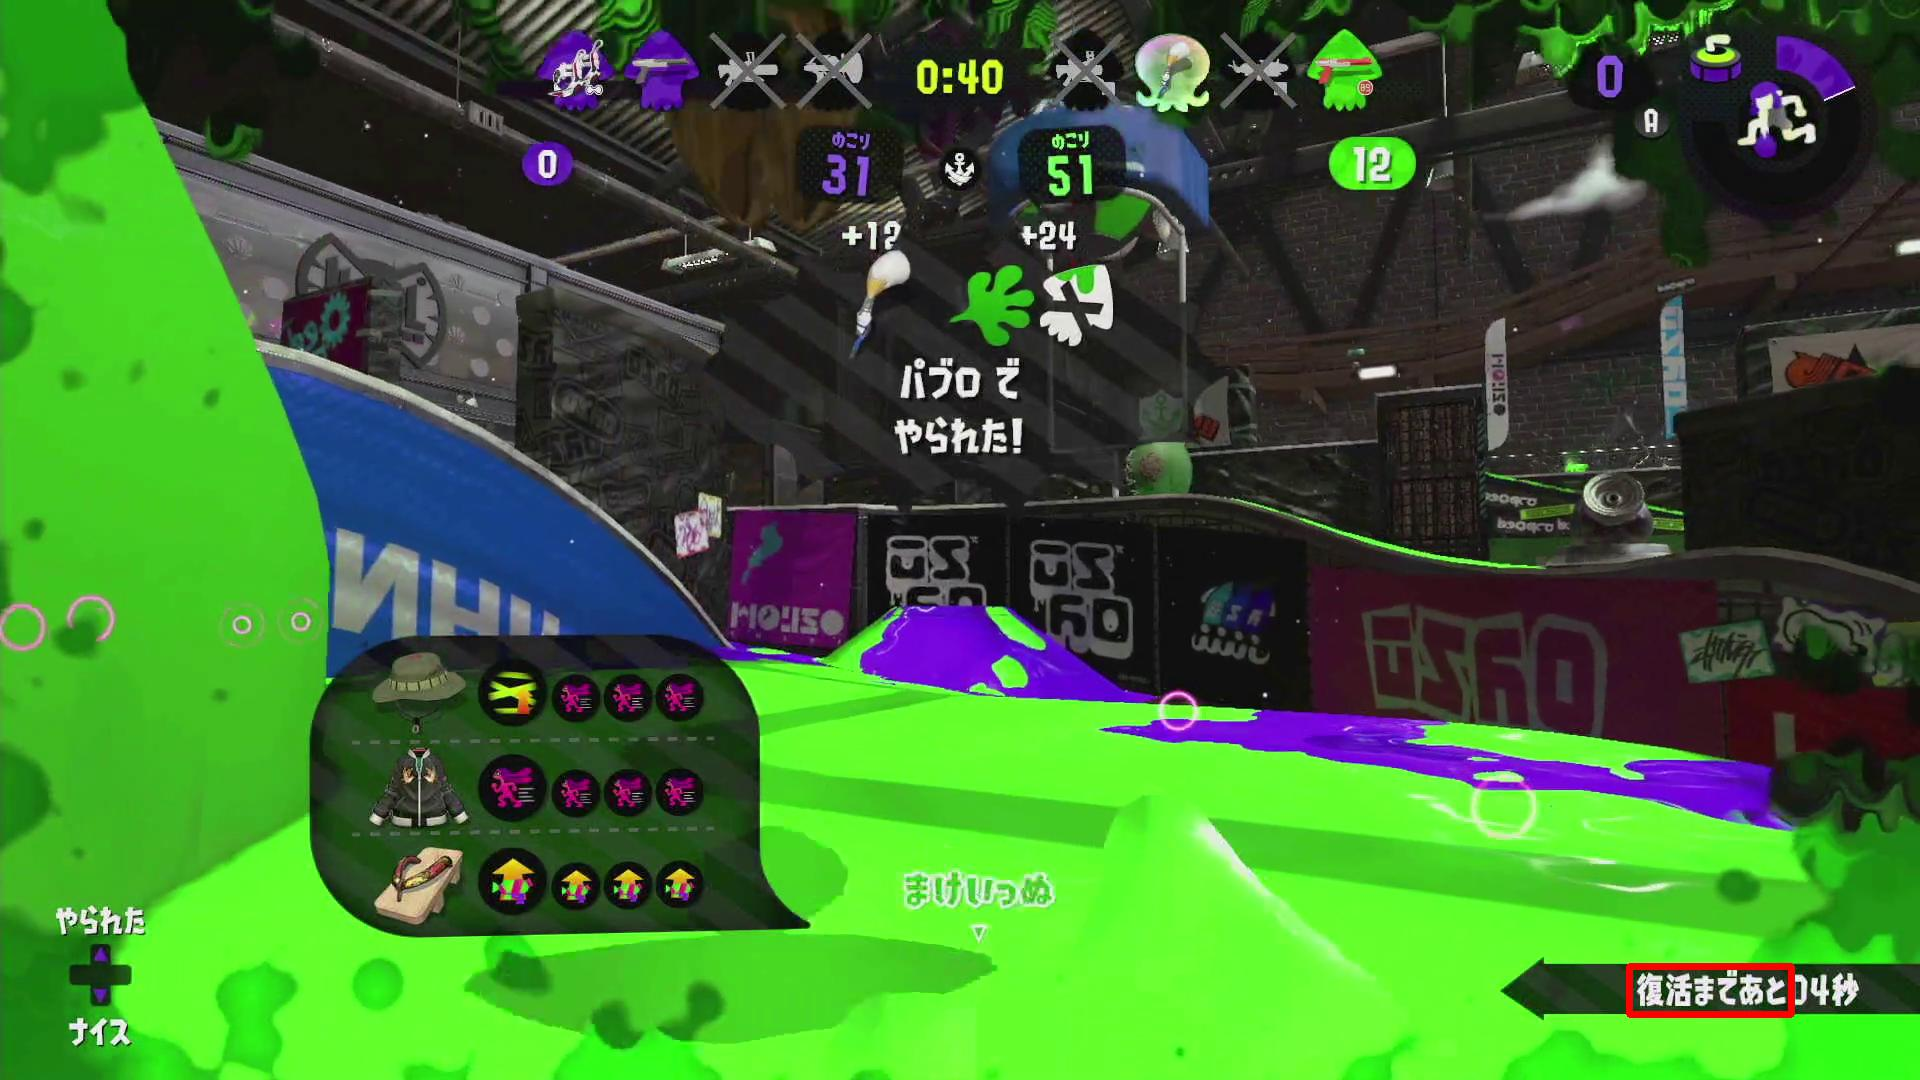

In [46]:
targets = [
    f"{SS_FILE_PATH}/in_battle/death1.png",
    f"{SS_FILE_PATH}/in_battle/death2.png",
]
for target in targets:
    result = matching(target, f"{TEMPLATE_FILE_PATH}/fukkatu2.png")
    show(result)

(764, 218) (1135, 530)


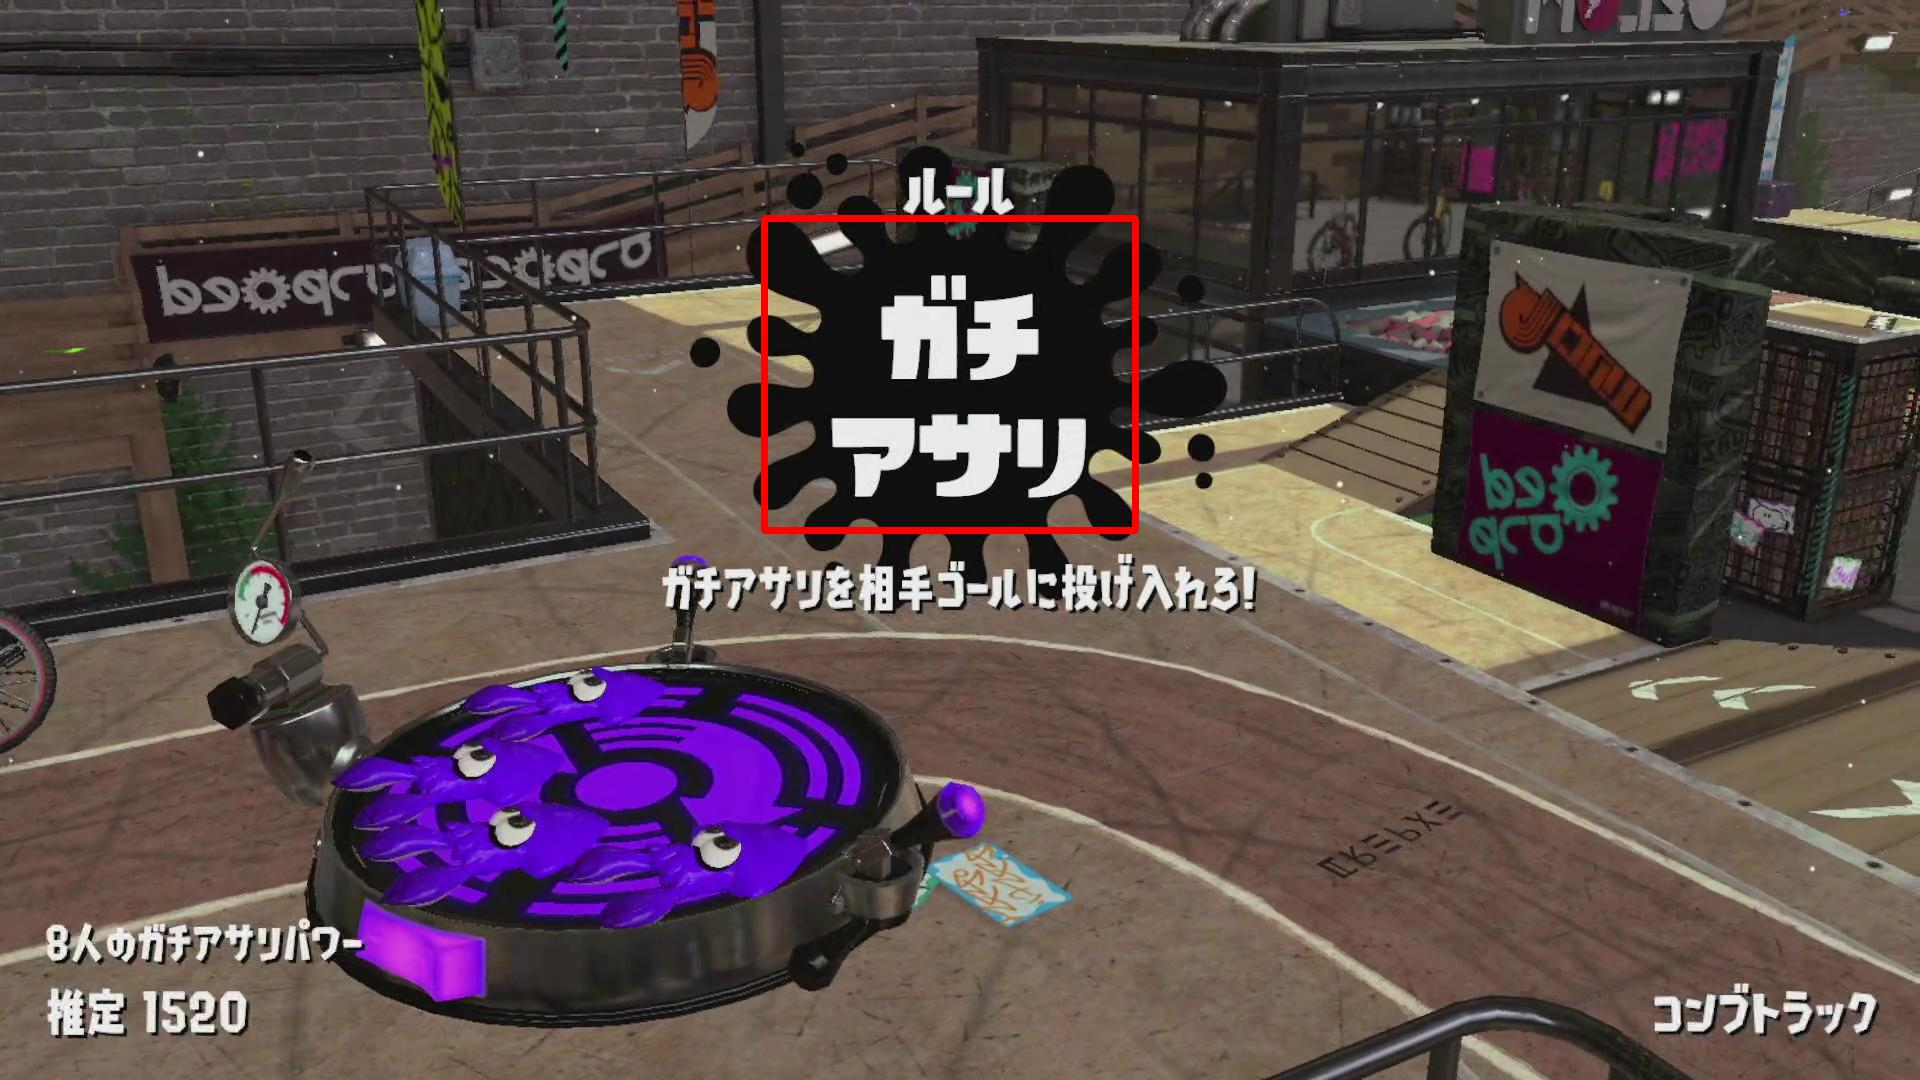

(764, 215) (1135, 527)


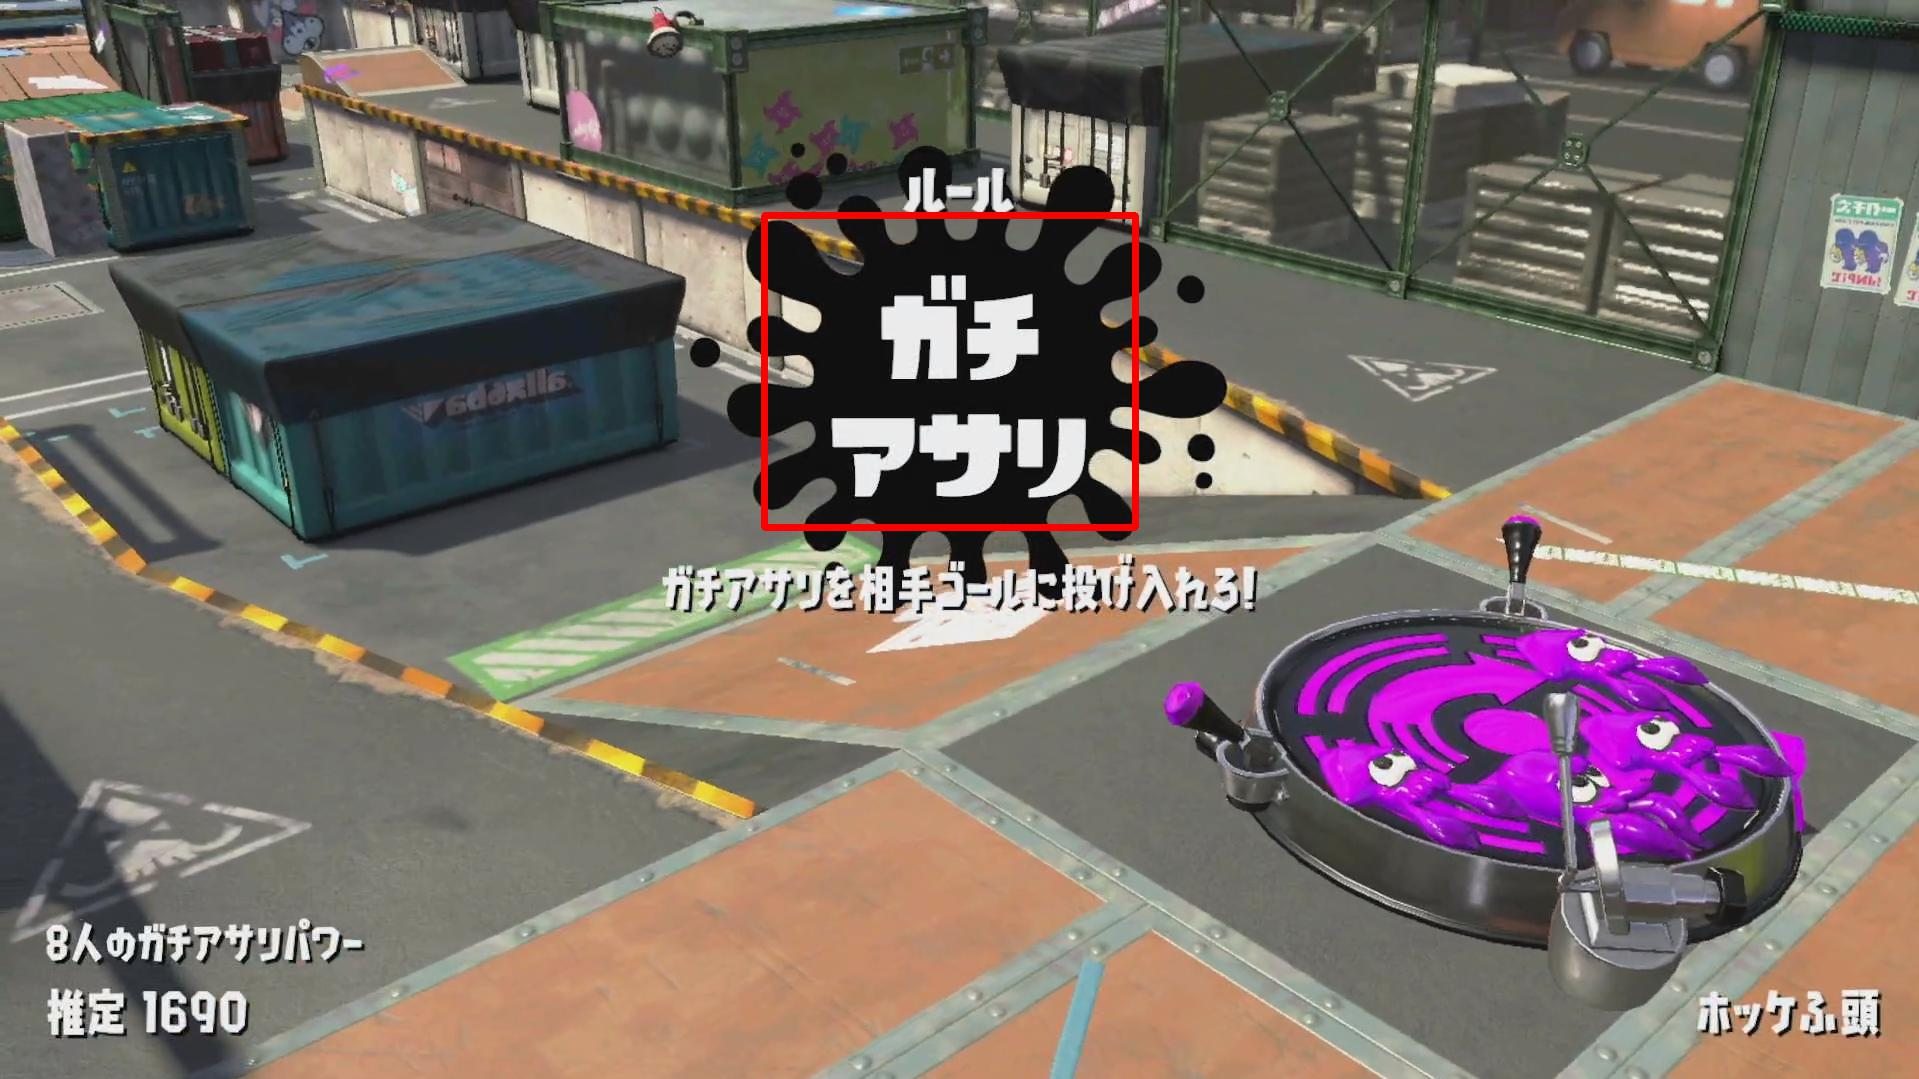

In [51]:
# 試合開始
targets = [
    f"{SS_FILE_PATH}/start_battle/gachiasari_konbutrack_1520.png",
    f"{SS_FILE_PATH}/start_battle/gachiasari_hokke_1690.png",
]
for target in targets:
    result = matching(target, f"{TEMPLATE_FILE_PATH}/gachi_asari.png")
    show(result)